# Нормализация и стандартизация

Установка библиотек

In [2]:
pip install seaborn

Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns

## Стандартизация

In [3]:
X_train = np.array([[ 1., -1.,  2., 10],
                    [ 2.,  0.,  0., 10],
                    [ 0.,  1., -1., 1]])

In [4]:
X_train.mean(axis=0)

array([1.        , 0.        , 0.33333333, 7.        ])

In [5]:
X_train.std(axis=0)

array([0.81649658, 0.81649658, 1.24721913, 4.24264069])

In [7]:
scaler = preprocessing.StandardScaler()
scaler

StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler()

In [9]:
scaler.mean_

array([1.        , 0.        , 0.33333333, 7.        ])

In [10]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913, 4.24264069])

In [11]:
X_train

array([[ 1., -1.,  2., 10.],
       [ 2.,  0.,  0., 10.],
       [ 0.,  1., -1.,  1.]])

In [12]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621,  0.70710678],
       [ 1.22474487,  0.        , -0.26726124,  0.70710678],
       [-1.22474487,  1.22474487, -1.06904497, -1.41421356]])

In [13]:
X_scaled.mean(axis=0)

array([0., 0., 0., 0.])

In [14]:
X_scaled.std(axis=0)

array([1., 1., 1., 1.])

In [19]:
# псевдокод
def standartization(array):
    mean = array.mean()
    std = array.std()
    array = (array - mean) / std


---

Попробуем создать небольшой пайплайн

In [23]:
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split #для обучения модели

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #для визуализации

In [24]:
X, y = make_classification()

In [25]:
?make_classification #для вызова справки по методу

(array([[ 1.,  1., 14., 19., 16., 36.,  7.,  6.,  0.,  0.],
        [ 0.,  0., 15., 34.,  6., 20., 16.,  6.,  1.,  2.],
        [ 0.,  0., 11., 32., 13., 28., 12.,  2.,  1.,  1.],
        [ 1.,  1.,  8., 17., 40., 25.,  7.,  1.,  0.,  0.],
        [ 0.,  1.,  6., 21., 31., 27., 13.,  1.,  0.,  0.],
        [ 0.,  2.,  8., 21., 33., 29.,  5.,  2.,  0.,  0.],
        [ 0.,  1., 15., 21., 31., 22.,  7.,  3.,  0.,  0.],
        [ 0.,  1.,  4., 24., 29., 32.,  9.,  1.,  0.,  0.],
        [ 1.,  1.,  7., 22., 38., 24.,  7.,  0.,  0.,  0.],
        [ 0.,  2.,  5., 28., 33., 20.,  9.,  2.,  1.,  0.],
        [ 0.,  1.,  8., 18., 39., 23.,  8.,  3.,  0.,  0.],
        [ 0.,  0.,  3., 22., 45., 30.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  6., 21., 37., 24., 11.,  0.,  0.,  0.],
        [ 1.,  1.,  6., 28., 32., 27.,  4.,  1.,  0.,  0.],
        [ 0.,  0.,  6., 24., 30., 20., 14.,  5.,  1.,  0.],
        [ 0.,  3.,  8., 31., 21., 28.,  6.,  2.,  1.,  0.],
        [ 0.,  1., 13., 16., 39., 21.,  

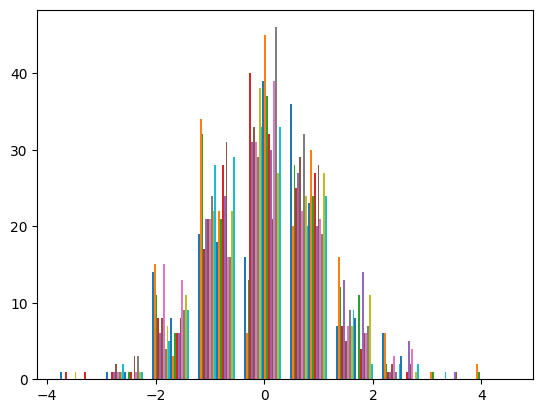

In [26]:
plt.hist(X)

Изменим Х (имитируем какие-то реальные данные)

In [27]:
X = X * 15.49 + 8.002

(array([[ 1.,  1., 14., 19., 16., 36.,  7.,  6.,  0.,  0.],
        [ 0.,  0., 15., 34.,  6., 20., 16.,  6.,  1.,  2.],
        [ 0.,  0., 11., 32., 13., 28., 12.,  2.,  1.,  1.],
        [ 1.,  1.,  8., 17., 40., 25.,  7.,  1.,  0.,  0.],
        [ 0.,  1.,  6., 21., 31., 27., 13.,  1.,  0.,  0.],
        [ 0.,  2.,  8., 21., 33., 29.,  5.,  2.,  0.,  0.],
        [ 0.,  1., 15., 21., 31., 22.,  7.,  3.,  0.,  0.],
        [ 0.,  1.,  4., 24., 29., 32.,  9.,  1.,  0.,  0.],
        [ 1.,  1.,  7., 22., 38., 24.,  7.,  0.,  0.,  0.],
        [ 0.,  2.,  5., 28., 33., 20.,  9.,  2.,  1.,  0.],
        [ 0.,  1.,  8., 18., 39., 23.,  8.,  3.,  0.,  0.],
        [ 0.,  0.,  3., 22., 45., 30.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  6., 21., 37., 24., 11.,  0.,  0.,  0.],
        [ 1.,  1.,  6., 28., 32., 27.,  4.,  1.,  0.,  0.],
        [ 0.,  0.,  6., 24., 30., 20., 14.,  5.,  1.,  0.],
        [ 0.,  3.,  8., 31., 21., 28.,  6.,  2.,  1.,  0.],
        [ 0.,  1., 13., 16., 39., 21.,  

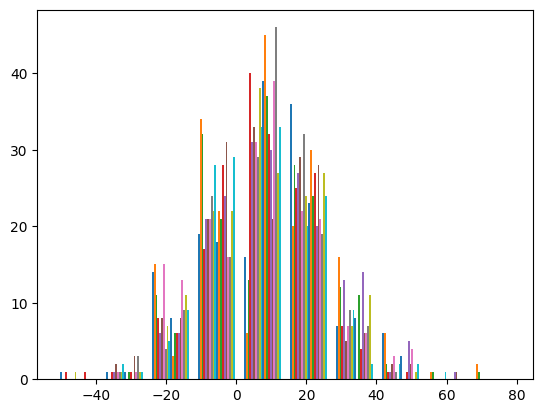

In [28]:
plt.hist(X)

In [29]:
y

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [30]:
X.shape

(100, 20)

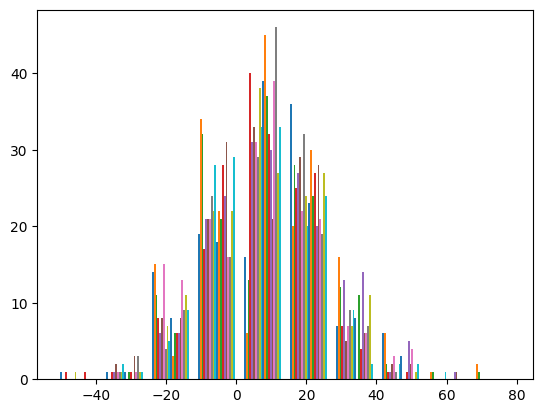

In [33]:
plt.hist(X); # ставиться тточка с запятой для отображения только гистограммы без таблицы

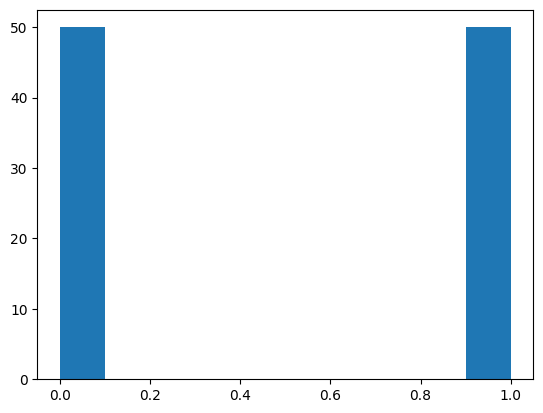

In [32]:
plt.hist(y);

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [36]:
pipe.fit(X_train, y_train)  #обучение

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [38]:
pipe.score(X_test, y_test)

0.84

In [39]:
model = LogisticRegression(solver="liblinear")

In [40]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [41]:
model.score(X_test, y_test)

0.8

In [42]:
y_pred = pipe.predict(X_test)

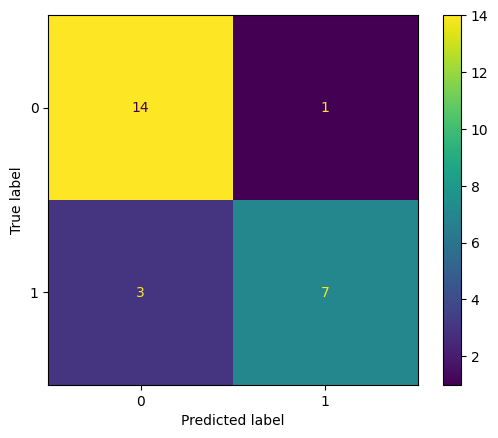

In [43]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.show()

## Нормализация (идет по столбцам)

### Min-max scaler

In [57]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [58]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

---

In [59]:
X_train = np.array([[ 1.5, 40000],
                    [ 2.0, 95000],
                    [ 1.7, 140000],
                    [ 1.7, 50000],
                    [ 1.8, 80000]])

In [60]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.  , 0.  ],
       [1.  , 0.55],
       [0.4 , 1.  ],
       [0.4 , 0.1 ],
       [0.6 , 0.4 ]])

In [48]:
min_max_scaler.transform(np.array([[1.1, 20000]]))

array([[-0.8, -0.2]])

In [49]:
X_train_minmax * 100

array([[  0.,   0.],
       [100.,  55.],
       [ 40., 100.],
       [ 40.,  10.],
       [ 60.,  40.]])

In [50]:
X_train_minmax * 2 - 1

array([[-1. , -1. ],
       [ 1. ,  0.1],
       [-0.2,  1. ],
       [-0.2, -0.8],
       [ 0.2, -0.2]])

### Max-abs scaler

Mасштабируется таким образом, что обучающие данные лежат в пределах диапазона [-1, 1]  
Он предназначен для данных, которые уже сосредоточены на нуле или разреженных данных.

In [69]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [70]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_minabs = max_abs_scaler.fit_transform(X_train)
X_train_minabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

---

In [71]:
X_train = np.array([[ 1.5, 40],
                    [ 2.0, 95],
                    [ 1.7, 140],
                    [ 1.7, 50],
                    [ 1.8, 80]])

In [72]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_minabs = max_abs_scaler.fit_transform(X_train)
X_train_minabs

array([[0.75      , 0.28571429],
       [1.        , 0.67857143],
       [0.85      , 1.        ],
       [0.85      , 0.35714286],
       [0.9       , 0.57142857]])

In [73]:
X_train_minabs.mean()

0.7242857142857143

In [74]:
X_train_minabs.std()

0.23828040418886354

---

## Влияние стандартизации на распределение

In [75]:
df = pd.DataFrame({
    'exponential': np.random.exponential(10, 1000),
    'normal_p': np.random.normal(10, 2, 1000)
})

<Axes: title={'center': 'Оригинальные распределения'}, xlabel='exponential', ylabel='Density'>

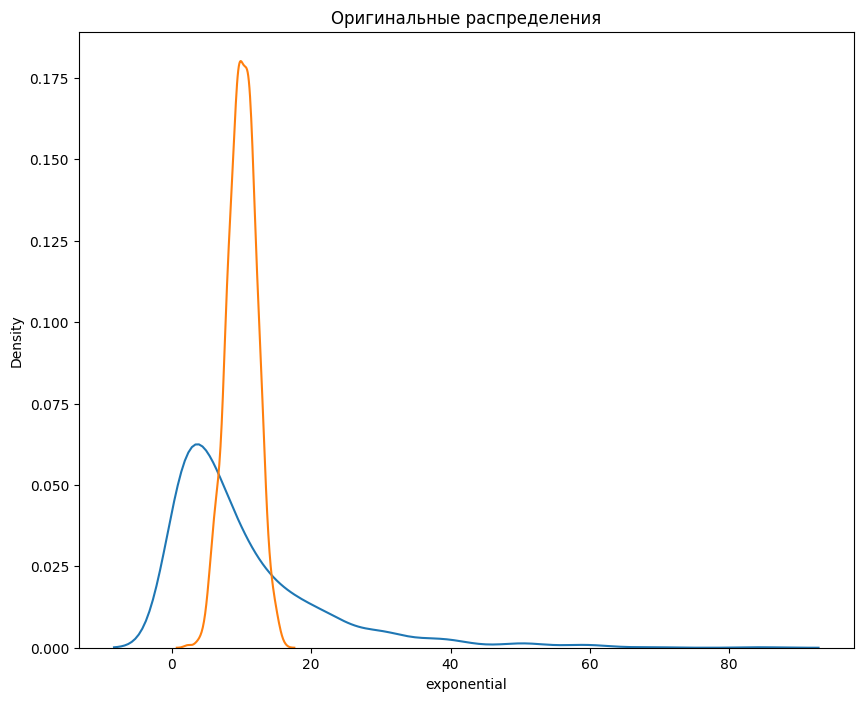

In [76]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (10, 8))
ax1.set_title('Оригинальные распределения')

sns.kdeplot(df['exponential'], ax = ax1)
sns.kdeplot(df['normal_p'], ax = ax1)

Стандартизуем датасет

In [77]:
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)

Преобразуем промежуточный датасет в полноценный датафрейм для визуализации

In [78]:
col_names = list(df.columns)
df_s = pd.DataFrame(df_s, columns = col_names)

Визуализируем

<Axes: title={'center': 'После стандартизации'}, xlabel='exponential', ylabel='Density'>

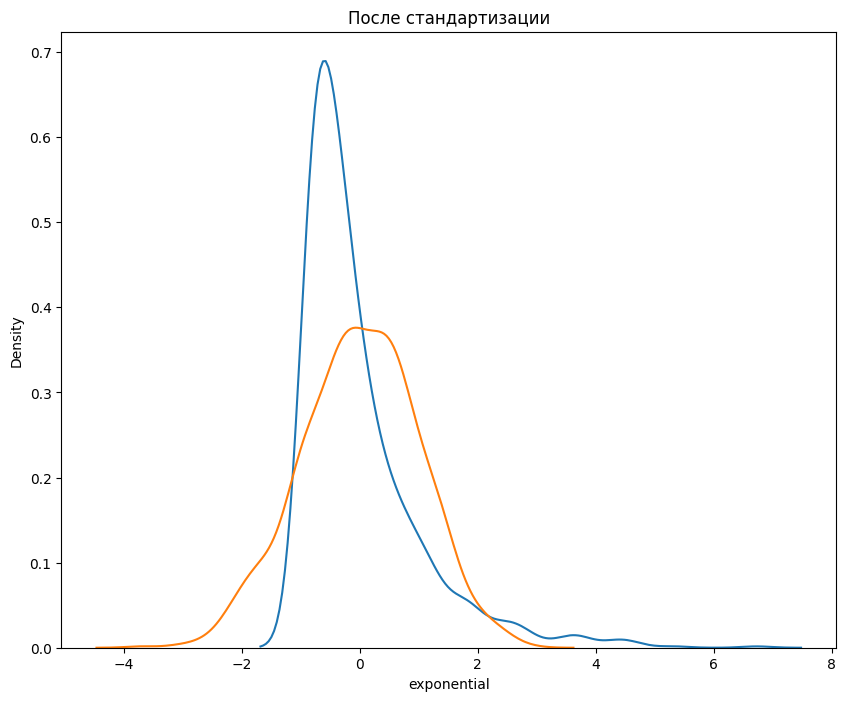

In [79]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (10, 8))

ax1.set_title('После стандартизации')

sns.kdeplot(df_s['exponential'], ax = ax1)
sns.kdeplot(df_s['normal_p'], ax = ax1)

<Axes: title={'center': 'До и после стандартизации'}, xlabel='normal_p', ylabel='Density'>

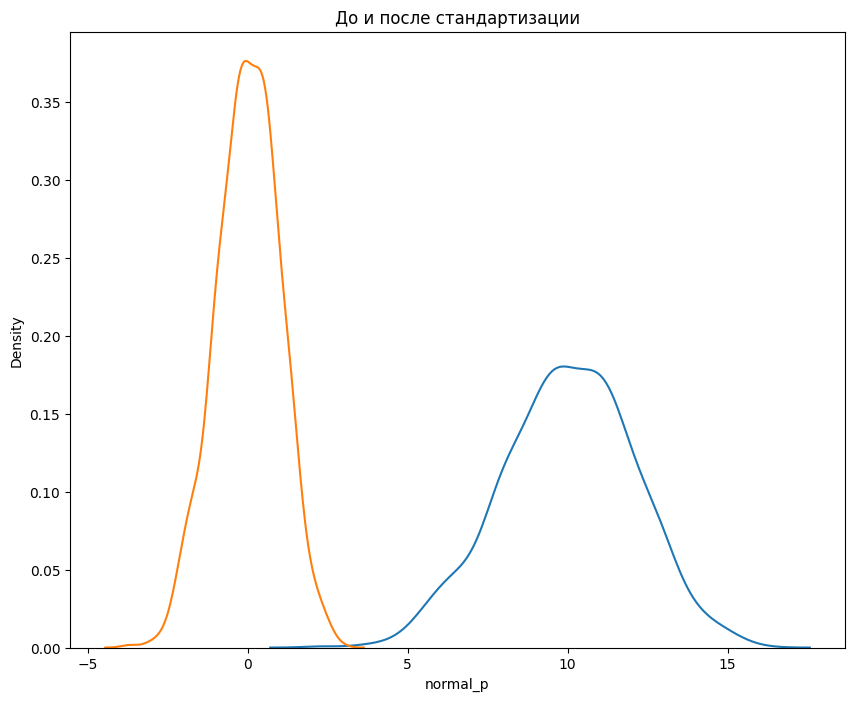

In [80]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (10, 8))

ax1.set_title('До и после стандартизации')
sns.kdeplot(df['normal_p'], ax = ax1)
sns.kdeplot(df_s['normal_p'], ax = ax1)